In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import cv2
import os

In [47]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable

In [5]:
# load in a haar cascade classifier for detecting frontal faces
# Modify the path
face_cascade = cv2.CascadeClassifier('........../opencv/data/haarcascades/haarcascade_frontalface_default.xml')

In [96]:
image = cv2.imread('Face3.jpeg')

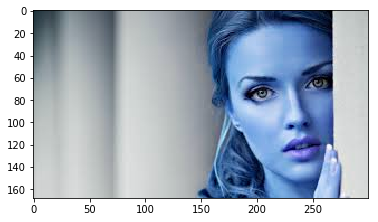

In [97]:
plt.imshow(image)

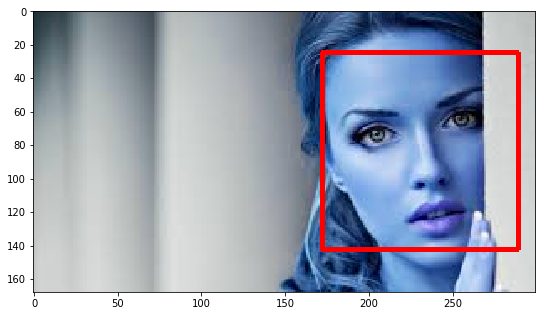

In [98]:
# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.2, 5)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for i,(x,y,w,h) in enumerate(faces):
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),2) 
    img = image[y:y+h,x:x+w]
fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

In [99]:
img_3 = img

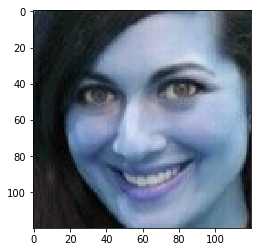

In [16]:
#img_1 = img
plt.imshow(img_1)

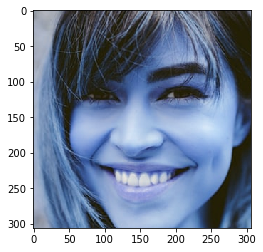

In [17]:
#img_2 = img
plt.imshow(img_2)

## Landmark detection

In [100]:
class Landmarks(nn.Module):
    def __init__(self):
        super(Landmarks, self).__init__()
        
        self.conv1 = nn.Conv2d(1,32,kernel_size=5,padding=2,stride=1)         # 80 * 80 -- 80 * 80 * 32
        self.conv2 = nn.Conv2d(32,64,kernel_size=3,padding=1,stride=1)        # 80 * 80 * 32  --> 80 * 80 * 64  --> 40 * 40 * 64
        self.conv3 = nn.Conv2d(64,128,kernel_size=3,padding=1,stride=1)       # 40 * 40 * 64  --> 38 * 38 * 128
        self.conv4 = nn.Conv2d(128,256,kernel_size=3,padding=1,stride=1)      # 40 * 40 * 128 --> 36 * 36 * 256 --> 18 * 18 * 256
        self.conv5 = nn.Conv2d(256,512,kernel_size=1)          # 18 * 18 * 256 --> 18 * 18 * 512 --> 9 * 9 *512
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(512*12*12,2048)
        self.fc2 = nn.Linear(2048,512)
        self.fc3 = nn.Linear(512,30)
        self.dropout = nn.Dropout(p=0.4)
    
    def forward(self,x):
        
        x = F.relu(self.conv1(x))
        #print(x.shape)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        x = x.view(-1,512*12*12)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        
        return x

In [101]:
landmarks = Landmarks()

In [102]:
os.listdir()

['Business-People-Wallpaper-586x293.jpg',
 'face-images-with-marked-landmark-points.zip',
 'Face detection.ipynb',
 'model_19_loss8.941969190325056.pth',
 'Facial landmarks.ipynb',
 'Face3.jpeg',
 'images.jpeg',
 'face-images-with-marked-landmark-points',
 'Facial landmark detection.ipynb',
 'facial-keypoints-detection.zip',
 'images (1).jpeg',
 'Face2.jpg',
 '.ipynb_checkpoints',
 'Face1.jpeg',
 'faces.zip',
 'data']

In [103]:
# Use your trained model
landmarks = torch.load('Saved model',map_location=torch.device('cpu'))

In [104]:
img_1_gray = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
img_2_gray = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)
img_3_gray = cv2.cvtColor(img_3,cv2.COLOR_BGR2GRAY)

In [105]:
img_1_gray = img_1_gray/255.
img_2_gray = img_2_gray/255.
img_3_gray = img_3_gray/255.

In [106]:
img_1_resize = cv2.resize(img_1_gray,(96,96))
img_2_resize = cv2.resize(img_2_gray,(96,96))
img_3_resize = cv2.resize(img_3_gray,(96,96))

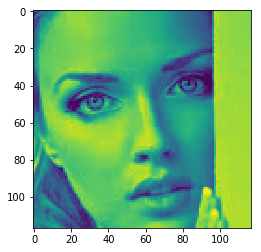

In [107]:
plt.imshow(img_3_gray)

In [108]:
img_1_gray = np.expand_dims(img_1_resize, 0)
img_1_gray = np.expand_dims(img_1_gray, 0)

In [109]:
img_2_gray = np.expand_dims(img_2_resize, 0)
img_2_gray = np.expand_dims(img_2_gray, 0)

In [110]:
img_3_gray = np.expand_dims(img_3_resize, 0)
img_3_gray = np.expand_dims(img_3_gray, 0)

In [112]:
img_3_gray.shape

(1, 1, 96, 96)

In [113]:
img_1_torch = Variable(torch.from_numpy(img_1_gray))
img_1_torch = img_1_torch.type(torch.FloatTensor)

In [114]:
img_2_torch = Variable(torch.from_numpy(img_2_gray))
img_2_torch = img_2_torch.type(torch.FloatTensor)

In [115]:
img_3_torch = Variable(torch.from_numpy(img_3_gray))
img_3_torch = img_3_torch.type(torch.FloatTensor)

In [116]:
keypoints_1 = landmarks(img_1_torch)

In [117]:
keypoints_2 = landmarks(img_2_torch)

In [118]:
keypoints_3 = landmarks(img_3_torch)

In [119]:
keypoints_1.shape

torch.Size([1, 30])

In [120]:
keypoints_1

tensor([[51.3203, 28.5520, 22.6474, 28.7268, 45.7788, 29.2500, 57.0008, 29.2032,
         28.5469, 29.5467, 17.1192, 29.3651, 43.4927, 22.6845, 61.6965, 22.9751,
         30.5411, 22.8512, 11.9872, 23.3649, 37.1052, 44.5668, 49.1870, 58.9438,
         25.4529, 59.1568, 37.2507, 56.7104, 37.3982, 64.0230]],
       grad_fn=<AddmmBackward>)

In [121]:
keypoints_2

tensor([[51.2329, 28.5051, 22.6102, 28.6787, 45.7026, 29.2015, 56.9031, 29.1550,
         28.4989, 29.4969, 17.0920, 29.3150, 43.4202, 22.6470, 61.5907, 22.9383,
         30.4894, 22.8131, 11.9687, 23.3247, 37.0415, 44.4918, 49.1022, 58.8439,
         25.4094, 59.0548, 37.1869, 56.6120, 37.3332, 63.9155]],
       grad_fn=<AddmmBackward>)

In [122]:
keypoints_3

tensor([[51.4157, 28.6046, 22.6904, 28.7783, 45.8664, 29.3037, 57.1040, 29.2580,
         28.5992, 29.5997, 17.1541, 29.4181, 43.5766, 22.7259, 61.8085, 23.0185,
         30.5978, 22.8921, 12.0125, 23.4073, 37.1750, 44.6455, 49.2751, 59.0507,
         25.5021, 59.2623, 37.3193, 56.8083, 37.4666, 64.1432]],
       grad_fn=<AddmmBackward>)

In [89]:
keypoints_1[0][0::2]

tensor([51.3203, 22.6474, 45.7788, 57.0008, 28.5469, 17.1192, 43.4927, 61.6965,
        30.5411, 11.9872, 37.1052, 49.1870, 25.4529, 37.2507, 37.3982],
       grad_fn=<SliceBackward>)

In [123]:
def showImg(image, keypoints):
    
    plt.figure()

    keypoints = keypoints.data.numpy()
    #keypoints = keypoints * 60.0 + 68
    #keypoints = np.reshape(keypoints, (68, -1))
    x_cord = keypoints[0][0::2]
    y_cord = keypoints[0][1::2]
    
    plt.imshow(image, cmap='gray')
    plt.scatter(x_cord, y_cord, s=50, marker='.', c='r')